This notebook plots a bar graph that shows the label distribution for the first 5000 samples in the CIFAR10 training set.

In [1]:
from typing import Any
from matplotlib import pyplot as plt
import pandas as pd
from torch.utils.data import Dataset
from torchvision.datasets import CIFAR10

Get the labels for the first 5000 training samples.

In [2]:
class SubsetDataset(Dataset):
    """Dataset wrapper that subsets the underlying dataset. """
    def __init__(self, to_subset: Dataset, num: int = 1000) -> None:
        """
        Args
            to_subset (Dataset): dataset to wrap
            num (int): number of samples in subset
        """
        self._data = to_subset
        self._num = num
        assert len(to_subset) >= num

    def __len__(self) -> int:
        return self._num

    def __getitem__(self, idx: int) -> Any:
        if idx >= self._num:
            raise IndexError(f'idx {idx} o.o.b. for {self._num}-len subset')
        return self._data[idx]

In [3]:
# 10% subset
cifar10_subset = SubsetDataset(
    to_subset=CIFAR10(
        root='C:/Users/chiwe/Data',
        train=True
    ),
    num=5000
)
subset_labels = [samp[1] for samp in cifar10_subset]

Count labels and plot bar graph.

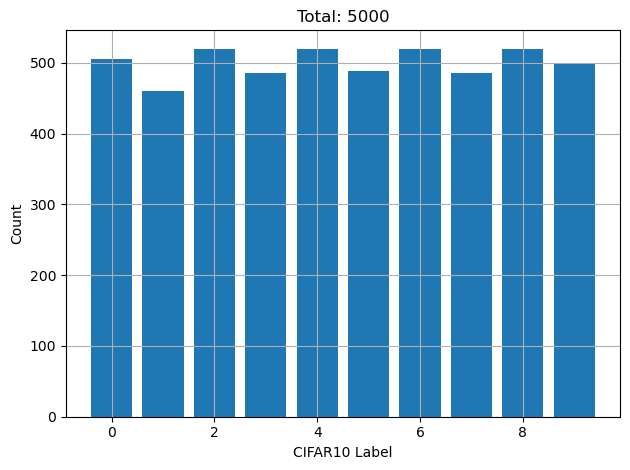

In [4]:
label_counts = pd.Series(subset_labels).value_counts()
labels = label_counts.keys().values
counts =  label_counts.values

fig, axes = plt.subplots()
axes.bar(labels, counts)
axes.set_xlabel('CIFAR10 Label')
axes.set_ylabel('Count')
axes.set_title(f'Total: {counts.sum()}')
axes.grid()
fig.tight_layout()